
# Практические задания.

# Задача Коши для ОДУ первого порядка.

## I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

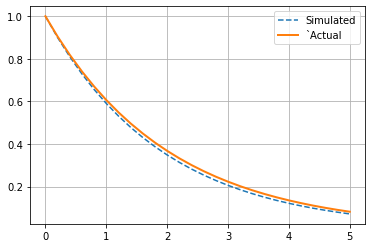

In [9]:
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, '--', label='Simulated')
plt.plot(tt, np.exp((-0.5)*tt), '-', lw=2, label='`Actual')
plt.legend()
plt.grid(True)

Теперь попробуем задать значение шага dt такое, что $|\lambda|dt > 1$.

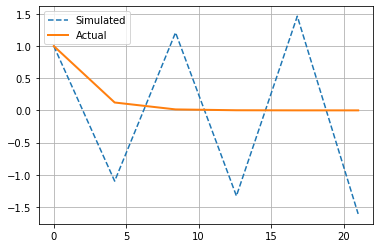

In [10]:
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, '--', label='Simulated')
plt.plot(tt, np.exp((-0.5)*tt), '-', lw=2, label='Actual')
plt.legend()
plt.grid(True)

## Задание 1. Неявный метод Эйлера.

Решите то же самое уравнение $$d u / d t=\lambda u, $$
 используя невную схему Эйлера. Сравните поведение неявной и явной схем Эйлера.  Постройте решение для нескольких значений шага интегрирования, опишите поведение решения при $\lambda\tau > 2$. 

In [18]:
def implicit_euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - lam * dt)
    return tt, y    
    raise NotImplementedError()

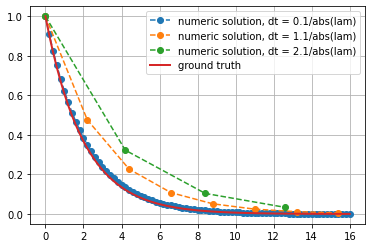

In [15]:
lam = -0.5
tt1, y1 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=0.1/abs(lam))
tt2, y2 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=1.1/abs(lam))
tt3, y3 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

plt.plot(tt1, y1, 'o--', label='numeric solution, dt = 0.1/abs(lam)')
plt.plot(tt2, y2, 'o--', label='numeric solution, dt = 1.1/abs(lam)')
plt.plot(tt3, y3, 'o--', label='numeric solution, dt = 2.1/abs(lam)')

plt.plot(tt1, np.exp(lam*tt1), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

In [17]:
#Для тестирования

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()

## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2$\times$2.


## Задание 2. Сравнение явной схемы Эйлера и матричной экспоненты.


Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [30]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=np.float64)
    u0 = np.asarray(u0, dtype=np.float64)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim, n = u0.shape[0], tt.shape[0]
    y = np.zeros((n, ndim))
    for i in range(n):
        y[i] = expm(a * tt[i]) @ u0
    return tt, y 
    raise NotImplementedError()

Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [33]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    
    a = np.asarray(a, dtype=np.float64)
    u0 = np.asarray(u0, dtype=np.float64)
    ndim, n = u0.shape[0], tt.shape[0]
    y = np.zeros((n, ndim))
    for i in range(n):
        y[i] = expm(a * tt[i]) @ u0
    return y 

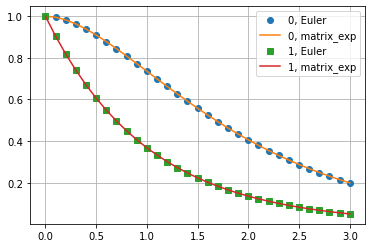

In [34]:
# Solve via Euler's method, compare to the matrix exponential
from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, matrix_exp')
plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, matrix_exp')

plt.legend(loc='best')
plt.grid(True)

In [35]:
# Сравните здесь метод Эйлера с методом матричной экспоненты

a = np.array([[-1, 1],
              [0, -1]], dtype=float)

## III. Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Система называется жесткой, если для всех $(x, \vec{y}(x))$ (на решениях системы) собственные значения матрицы Якоби системы  $\mathbf{J}(x)$ (в данном случае она равна $A$)  удовлетворяют условиям

 $\max _j\left|\operatorname{Re} \lambda_j\right| / \min _k\left|\operatorname{Re} \lambda_k\right| \gg 1, \quad \operatorname{Re} \lambda_j<0$, $\max _j\left|\operatorname{Im} \lambda_j\right| \ll \max _k\left|\operatorname{Re} \lambda_k\right| \forall j, k$. 
 
 Число $s=\max _i\left|\operatorname{Re} \lambda_i\right| / \min _k\left|\operatorname{Re} \lambda_k\right|$ называется числом жесткости системы.

Пример.

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-800 u+4 \cdot 10^{-2} v+2 \cdot 10^{-2} w, u(0)=0, \\
v^{\prime}=-5 v-3 w, v(0)=4, \\
w^{\prime}=v-w, w(0)=6,
\end{array}\right\} \quad \quad \begin{array}{l|ll}
1 / 5 & 1 / 5 & 0 \\
4 / 5 & 3 / 5 & 1 / 5 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получим для него функцию и условие устойчивости. Вычислим число жёсткости.

$$
R(z)=\frac{1+\frac{3}{5} z+\left(\frac{1}{2}-\frac{2}{5}+\frac{1}{25}\right) z^2}{1-\frac{2}{5} z+\frac{1}{25} z^2}
$$
Матрица $\mathbf{J}(x)$ (см. формулу (7.1.3)) постоянна и ее собственные значения $\lambda_1=-2, \lambda_2=-4, \lambda_3=-800$ лежат на действительной оси. Так как $z_i=\lambda_i h$, то и функцию устойчивости достаточно исследовать на действительной оси. 

Область устойчивости определяется из условия $|R(z)| \leq 1$. Получаем

 $\operatorname{Im} z_i=0, \operatorname{Re} z_i\left(1+\operatorname{Re} z_i / 10\right) \leq 0, i=1,2,3$.


Шаг интегрирования, который удовлетворяет всем условиям $h \in(0,10 / 800]$. 

Число жесткости $s=800 / 2=400$. 

## Задание 3.  Проверка жёсткости системы и неявные методы.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

Решите систему, используя фиксированный шаг $$\tau=0.01 .$$ 

 Стабилен ли метод на шаге такого размера? 


In [36]:
A = np.array([[-10, 10],[32, -499]])
print(np.round(np.linalg.eigvals(A), 3))

[  -9.346 -499.654]


Отношение лямбд >> 1, поэтому система жёсткая.

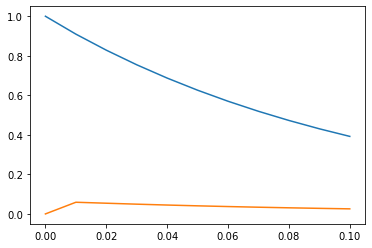

In [37]:
t, y  = euler_solve2(A, u0=[1, 0], T=0.1, dt=0.01)
plt.plot(t, y[:, 0], label='0, Euler')
plt.plot(t, y[:, 1], label='1, Euler')

Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

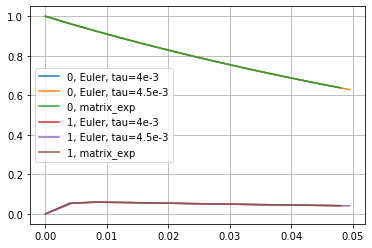

In [38]:
t1, y1  = euler_solve2(A, u0=[1, 0], T=0.05, dt=4e-3)
t2, y2  = euler_solve2(A, u0=[1, 0], T=0.05, dt=4.5e-3)
ym = mat_exp_solve(A, [1, 0], t1)

plt.plot(t1, y1[:, 0], '-', label='0, Euler, tau=4e-3')
plt.plot(t2, y2[:, 0], '-', label='0, Euler, tau=4.5e-3')
plt.plot(t1, ym[:, 0], '-', label='0, matrix_exp')

plt.plot(t1, y1[:, 1], '-', label='1, Euler, tau=4e-3')
plt.plot(t2, y2[:, 1], '-', label='1, Euler, tau=4.5e-3')
plt.plot(t1, ym[:, 1], '-', label='1, matrix_exp')

plt.legend(loc='best')
plt.grid(True)

Реализуйте неявную схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте np.linalg.solve ).

Сравните решения, полученные явной и неявной схемами Эйлера.

In [39]:
def euler_solve2_imp(a, u0, T, dt):
    """Solve the system du/dt = Au via an implicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps+1, ndim))
    y[0] = u0
    for i in range(num_steps):
        y[i+1] = np.linalg.solve(np.eye(ndim) - dt * a, y[i])
    return tt, y

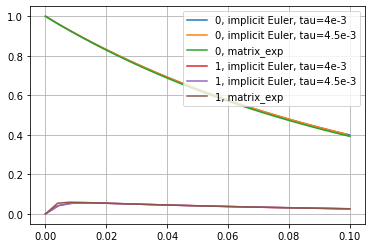

In [40]:
t1, y1  = euler_solve2_imp(A, u0=[1, 0], T=0.1, dt=4e-3)
t2, y2  = euler_solve2_imp(A, u0=[1, 0], T=0.1, dt=4.5e-3)
ym = mat_exp_solve(A, [1, 0], t1)
plt.plot(t1, y1[:, 0], '-', label='0, implicit Euler, tau=4e-3')
plt.plot(t2, y2[:, 0], '-', label='0, implicit Euler, tau=4.5e-3')
plt.plot(t1, ym[:, 0], '-', label='0, matrix_exp')
plt.plot(t1, y1[:, 1], '-', label='1, implicit Euler, tau=4e-3')
plt.plot(t2, y2[:, 1], '-', label='1, implicit Euler, tau=4.5e-3')
plt.plot(t1, ym[:, 1], '-', label='1, matrix_exp')
plt.legend(loc='best')
plt.grid(True)

## Задание 4*. Исследование на A- и L-устойчивость.

Определить функцию устойчивости и область устойчивости метода Рунге-Кутты заданного таблицей Бутчера: 

\begin{array}{l|ll}
0 & 0 & 0 \\
2 & 3 / 2 & 1 / 2 \\
\hline & 3 / 4 & 1 / 4
\end{array}

Исследовать его на A- и L-устойчивость. 

## Задание 5*. Исследование на жесткость и область устойчивости.ё

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-400 u, u(0)=1, \\
v^{\prime}=3 \cdot 10^{-2} u-10 v+w, v(0)=-1, \\
w^{\prime}=-4 \cdot 10^{-2} u-12 v-2 w, w(0)=0,
\end{array}\right\} \quad \begin{array}{l|ll}
1 / 8 & 1 / 8 & 0 \\
7 / 8 & 3 / 4 & 1 / 8 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получите для него функцию и условие устойчивости. Вычислите число жёсткости.

# Задача Коши для ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$


## Задание 6. Законы сохранения и решение ОДУ.

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.


Решите данную систему уравнений, используя явную  схему Эйлера на интервале времени не менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

In [41]:
# YOUR CODE HERE
def euler_oscillator(u0, v0, omega, dt, T_calc):
    n_steps = int(T_calc / dt)
    ts = np.arange(n_steps+1)*dt
    u = np.empty(n_steps+1)
    v = np.empty(n_steps+1)
    u[0] = u0
    v[0] = v0
    for i in range(n_steps):
        u[i+1] = u[i] + v[i] * dt
        v[i+1] = v[i] - omega**2 * u[i] * dt
    return ts, u, v

def energy(u, v, omega):
    return v**2 / 2 + omega**2 * u**2 / 2

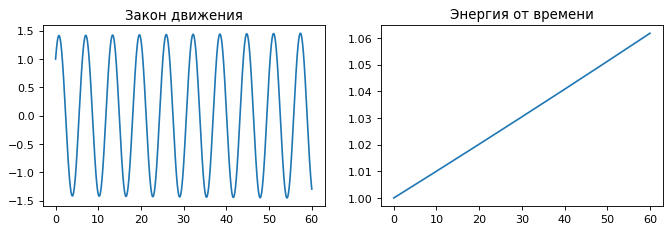

In [42]:
ts, u, v = euler_oscillator(1, 1, 1, 0.001, 60);
E = energy(u, v, 1)
fig, axs = plt.subplots(1, 2, dpi=80, figsize=(10,3))
axs[0].plot(ts, u)
axs[1].plot(ts, E)
axs[0].set_title("Закон движения")
axs[1].set_title("Энергия от времени")
plt.show()

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

In [43]:
# YOUR CODE HERE
def runge_kutta_oscillator(u0, v0, omega, dt, T_calc):
    n_steps = int(T_calc / dt)
    ts = np.arange(n_steps+1)*dt
    u = np.empty(n_steps+1)
    v = np.empty(n_steps+1)
    u[0] = u0
    v[0] = v0
    for i in range(n_steps):
        u[i+1] = (-omega**2 * dt**2 / 4 * u[i] + dt * v[i] + u[i]) / (1 + omega**2 * dt**2 / 4)
        v[i+1] =  (v[i] - omega**2 * dt**2 / 4 * v[i] - omega**2 * dt * u[i]) / (1 + omega**2 * dt**2 / 4)
    return ts, u, v

Проверьте соблюдение закона сохранения энергии после выполнения большого количества шагов. Нарисуйте графики решений вместе с графиком точного решения. 


Text(0.5, 1.0, 'Законы движения')

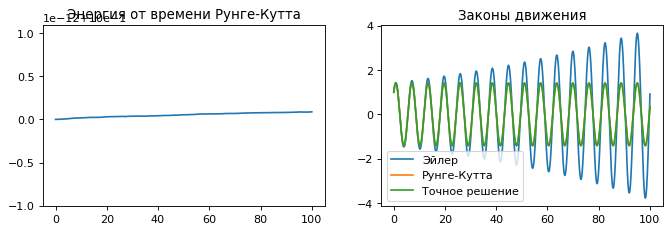

In [44]:
# YOUR CODE HERE
ts, u1, v1 = euler_oscillator(1, 1, 1, 0.02, 100)
ts, u2, v2 = runge_kutta_oscillator(1, 1, 1, 0.02, 100)
E = energy(u2, v2, 1)
fig, axs = plt.subplots(1, 2, dpi=80, figsize=(10,3))
axs[0].plot(ts, E)
axs[0].set_title("Энергия от времени Рунге-Кутта")
axs[1].plot(ts, u1, label='Эйлер')
axs[1].plot(ts, u2, label='Рунге-Кутта')
axs[1].plot(ts, np.sin(ts) + np.cos(ts), label='Точное решение')
axs[1].legend(loc='best')
axs[1].set_title("Законы движения")

Энергия для Рунге-Кутта практически не растёт.

Решите задачу используя предиктор и корректор. Предиктор - дифференциальное уравнение первого порядка, корректор - закон сохранения энергии. Убедитесь, что при большом количестве шагов закон сохранения энергии теперь сохраняется. Отличается ли полученное решение от точного решения после большого количества шагов?

.....

## Задание 7. Методы предиктора и корректора для ОДУ.

.....

## Задание 8. Нелинейное уравнение Пуассона.

Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с начальными условиями $\phi(0)=0 \quad  , \phi^{\prime }(0) = 0.$

Постройте аналитическое решение с помощью ряда Тейлора и сравните с численным. 

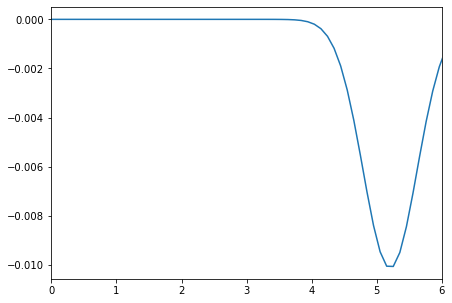

In [48]:
def poisson(phi_0, phi_prime_0, N):
    
    gridt = np.linspace(0, 10, N)
    
    dT = gridt[1] - gridt[0]
    phi, phi_prime, phi_prime_prime = np.zeros(N), np.zeros(N), np.zeros(N)
    
    phi[0] , phi_prime[0] = phi_0, phi_prime_0
    for i in range(N-1):
        
        T = gridt[i]
        
        phi_prime_prime[i+1] = np.exp(phi[i]) - 1 - np.exp(-3*(T-5)**2)
        phi_prime[i+1] = dT*(phi_prime_prime[i+1]+phi_prime_prime[i])/2
        phi[i+1] = dT*(phi_prime[i+1]+phi_prime[i])/2
        
    plt.figure(figsize=(7, 5))
    plt.plot(gridt, phi, '-')
    plt.xlim(0, 6)
    plt.show()    

poisson(0, 0, 100)